In [7]:
import pandas as pd
import numpy as np 

In [3]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [5]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

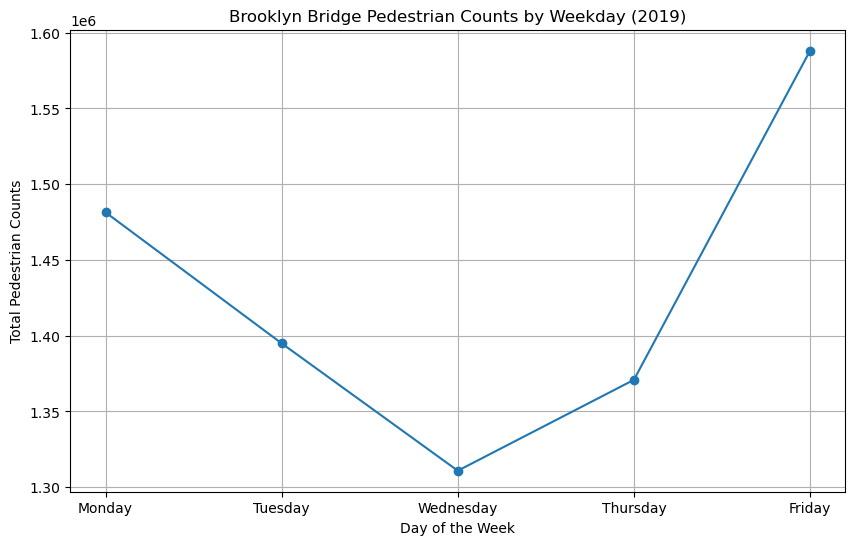

In [16]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df['week_days'] = df['hour_beginning'].dt.day_name()
df_weekdays = df[df['week_days'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_pedestrian_counts = df_weekdays.groupby('week_days')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Plot the line graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weekday_pedestrian_counts.index, weekday_pedestrian_counts.values, marker='o')
plt.title('Brooklyn Bridge Pedestrian Counts by Weekday (2019)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Counts')
plt.grid(True)
plt.show()

2.

Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

In [28]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,week_days
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday


In [40]:
brooklyn_pedestrian_counts = df_2019[['hour_beginning', 'Pedestrians', 'weather_summary']].dropna()
weather_encoded = pd.get_dummies(brooklyn_pedestrian_counts['weather_summary'])
brooklyn_pedestrian_counts = pd.concat([brooklyn_pedestrian_counts, weather_encoded], axis=1)
correlation_matrix = brooklyn_pedestrian_counts.drop(columns=['hour_beginning', 'weather_summary']).corr()
correlation_matrix.iloc[:,0]

Pedestrians            1.000000
clear-day              0.339433
clear-night           -0.378187
cloudy                -0.081933
fog                   -0.026531
partly-cloudy-day      0.497585
partly-cloudy-night   -0.282736
rain                  -0.138987
sleet                 -0.017136
snow                  -0.034149
wind                  -0.000196
Name: Pedestrians, dtype: float64

3.

Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.

In [45]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

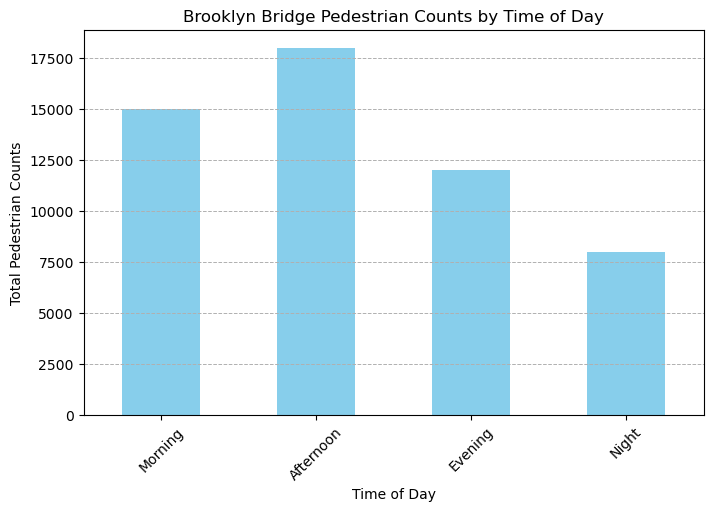

In [47]:
import matplotlib.pyplot as plt

# Placeholder data for demonstration
time_of_day_counts = pd.Series({
    'Morning': 15000,
    'Afternoon': 18000,
    'Evening': 12000,
    'Night': 8000
})

plt.figure(figsize=(8, 5))
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Brooklyn Bridge Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()